In [1]:
import os
import sys

In [2]:
#sys.path.insert(0, '/Users/marusy/Programming/another-fem-framework/')
sys.path.insert(0, '/home/lshtanko/Programming/another-fem-framework/')

In [118]:
import numpy as np
from interpolant.cell_to_points import Cell2PointsConverter
from interpolant.strict import StrictSolve
from interpolant.opt import OptSolve
from common.helpers import *
from interpolant.helpers import *
from matplotlib import pyplot as plt
%matplotlib inline

In [119]:
c2p = Cell2PointsConverter(orders=[[3],[3,3]])

In [120]:
strict_solve = StrictSolve(points=c2p.get_points(), weights=c2p.get_diag_weights(), verbose=True)

In [121]:
strict_solve.fit_strict(max_power=strict_solve.get_max_pow(unrisky=False), method='sympy')

Number of equations: 22
Number of degrees of freedom: 28
Strictly stitched_power: 1
Start solving strict part
End solving strict part
NullspaceRank: 8


In [122]:
interps = strict_solve.get_interpolants()
wgths = strict_solve.get_weight_matrices()

In [123]:
opt_solve = OptSolve(matrices=interps,
                     points=c2p.get_points(),
                     strict_power=strict_solve.get_max_pow(unrisky=False),
                     weights_matrices=wgths,
                     verbose=True
                    )

In [ ]:
opt_solve.fit_opt(constraints=True, tr_fun_option='chebyshev', orders_forwards=2)

In [99]:
opt_solve.restart_opt(tolerance=1e-3)

In [15]:
I_rl = np.array(opt_solve.I_rl_subbed).astype(np.float64)
I_lr = np.array(opt_solve.I_lr_subbed).astype(np.float64)

In [94]:
tr_f = np.vectorize(lambda x: (x-0.5)*x)

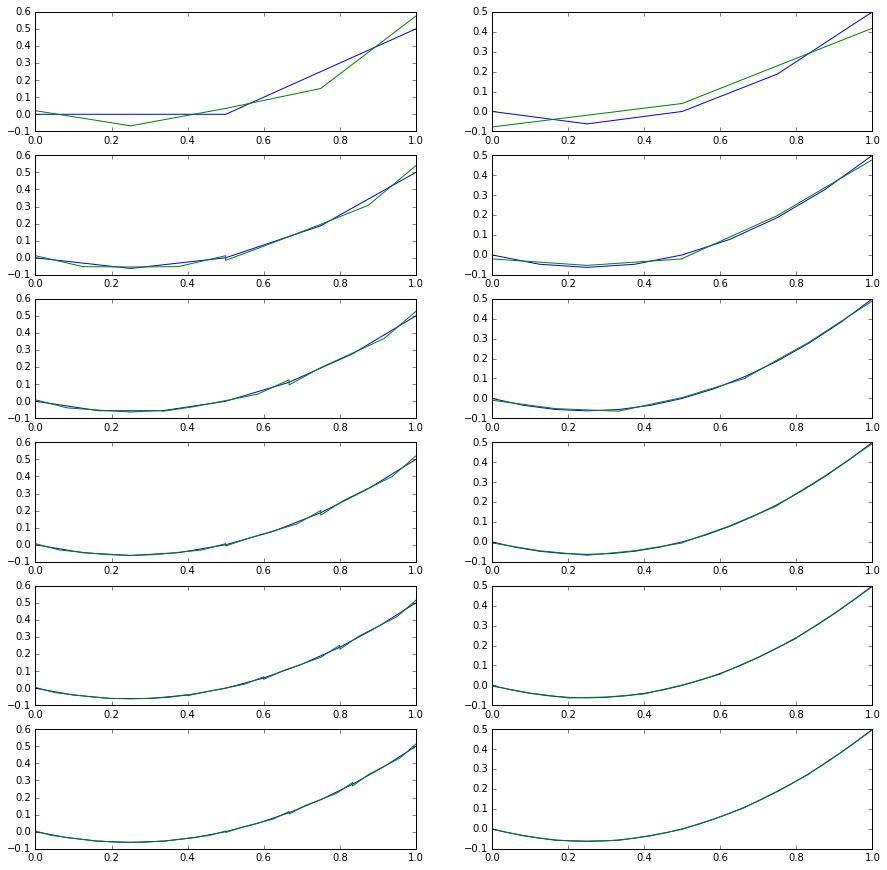

In [111]:
eps_l, eps_r = convergence_test(I_lr=new_int1,
                                I_rl=new_int2,
                                p_l=opt_solve.points[0],
                                p_r=opt_solve.points[1],
                                init_size=(0,1),
                                tr_f=tr_f,
                                weights=[np.array(strict_solve.W_l), np.array(strict_solve.W_r)],
                                div_lim=7)

In [ ]:
explosion_test(I_lr=I_lr,
               I_rl=I_rl,
               p_l=opt_solve.points[0],
               p_r=opt_solve.points[1],
               tr_f=tr_f,
               reps=3)

In [ ]:
plt.semilogy(range(len(eps_l)), eps_l)
plt.semilogy(range(len(eps_r)), eps_r)
plt.semilogy(np.linspace(0, len(eps_r)), float(eps_r[0])*np.exp(-np.linspace(0, len(eps_r))))
plt.semilogy(np.linspace(0, len(eps_r)), float(eps_r[0])*np.exp(-2*np.linspace(0, len(eps_r))))

In [22]:
np.linalg.eigvals(np.dot(new_int1, new_int2))

array([  6.49667686e-01,   9.93861765e-01,   1.00000000e+00,
         2.39906376e-17,  -4.91032846e-17])

In [96]:
np.linalg.eigvals(np.dot(I_lr, I_rl))

array([  9.99861307e-01,   1.00000000e+00,   9.99935725e-01,
         5.19472713e-17,   2.60898774e-17])

In [16]:
new_int1 = (I_lr + I_lr[::-1,::-1])/2

In [17]:
new_int2 = (I_rl + I_rl[::-1, ::-1])/2

In [ ]:
c2p.get_weights()[0]

In [ ]:
np.dot(I_rl, c2p.get_weights()[1]).sum()

In [18]:
np.dot(np.dot(c2p.get_diag_weights()[1], new_int1), np.linalg.inv(c2p.get_diag_weights()[0]))

array([[ 0.57288245, -0.02286845,  0.01859134],
       [ 0.59966694,  0.4179349 , -0.27140653],
       [ 0.0802658 ,  0.2098671 ,  0.0802658 ],
       [-0.27140653,  0.4179349 ,  0.59966694],
       [ 0.01859134, -0.02286845,  0.57288245]])

In [23]:
new_int2

array([[ 0.57288245,  0.59966694,  0.0802658 , -0.27140653,  0.01859134],
       [-0.02286845,  0.4179349 ,  0.2098671 ,  0.4179349 , -0.02286845],
       [ 0.01859134, -0.27140653,  0.0802658 ,  0.59966694,  0.57288245]])

In [24]:
new_int1

array([[ 1.1457649 , -0.18294757,  0.03718267],
       [ 0.29983347,  0.83586979, -0.13570326],
       [ 0.0802658 ,  0.83946839,  0.0802658 ],
       [-0.13570326,  0.83586979,  0.29983347],
       [ 0.03718267, -0.18294757,  1.1457649 ]])

In [114]:
I_s2b = np.array([[0.94748435, 0.08218652, 0.00679549, -0.03646636],
                               [0.31304669, 0.81263552, -0.09974331, -0.02593889],
                               [-0.12478712, 1.00624854, 0.11348253, 0.00505606],
                               [0.22008957, 0.05460024, 0.68518757, 0.04012262],
                               [-0.01387373, 0.20320454, 0.7569224, 0.05374679],
                               [-0.06389369, -0.06951784, 1.05398856, 0.07942297],
                               [0.0598758, 0.04575923, -0.50042152, 1.39478649]])

I_b2s = np.array([[4.73742176e-01, 7.82616722e-01, -3.11967812e-01,
                                2.20089572e-01, -3.46843350e-02, -1.59734222e-01,
                                2.99378982e-02],
                               [8.21865191e-03, 4.06317760e-01, 5.03124268e-01,
                                1.09200474e-02, 1.01602272e-01, -3.47589224e-02,
                                4.57592318e-03],
                               [6.79548951e-04, -4.98716573e-02, 5.67412656e-02,
                                1.37037514e-01, 3.78461201e-01, 5.26994280e-01,
                                -5.00421522e-02],
                               [-1.82331802e-02, -6.48472355e-02, 1.26401418e-02,
                                4.01226215e-02, 1.34366971e-01, 1.98557435e-01,
                                6.97393247e-01]])

In [115]:
I_b2s = (I_b2s + I_b2s[::-1, ::-1])/2
I_s2b = (I_s2b + I_s2b[::-1, ::-1])/2

In [116]:
I_b2s

array([[ 0.58556771,  0.49058708, -0.08880042,  0.1301061 , -0.0110221 ,
        -0.11229073,  0.00585236],
       [-0.02091175,  0.46665602,  0.44079273,  0.07397878,  0.07917177,
        -0.04231529,  0.00262774],
       [ 0.00262774, -0.04231529,  0.07917177,  0.07397878,  0.44079273,
         0.46665602, -0.02091175],
       [ 0.00585236, -0.11229073, -0.0110221 ,  0.1301061 , -0.08880042,
         0.49058708,  0.58556771]])

In [117]:
I_s2b

array([[ 1.17113542, -0.2091175 ,  0.02627736,  0.01170472],
       [ 0.19623483,  0.93331204, -0.08463057, -0.04491629],
       [-0.03552016,  0.88158547,  0.15834353, -0.00440883],
       [ 0.1301061 ,  0.3698939 ,  0.3698939 ,  0.1301061 ],
       [-0.00440883,  0.15834353,  0.88158547, -0.03552016],
       [-0.04491629, -0.08463057,  0.93331204,  0.19623483],
       [ 0.01170472,  0.02627736, -0.2091175 ,  1.17113542]])